Welcome to the exercises for day 7 (to go along with the day 7 tutorial notebook on [imports and objects](https://www.kaggle.com/colinmorris/learn-python-challenge-day-7))

Run the setup code below before working on the questions (and run it again if you leave this notebook and come back later).

In [1]:
"""
import sys; sys.path.insert(0, '../input/learntools/learntools')
from learntools.python import binder; binder.bind(globals())
from learntools.python.ex4 import *
print('Setup complete.')
"""
%matplotlib inline
import sys
import os
ltp = os.path.abspath('../../../')
sys.path.append(ltp)
from learntools.python import binder
binder.bind(globals())
from learntools.python.ex7 import *

# Exercises

## 1.

After completing day 5 of the Learn Python Challenge, Jimmy noticed that, according to his `estimate_average_slot_payout` function, the slot machines at the Learn Python Casino are actually rigged *against* the house, and are profitable to play in the long run.

Starting with $200 in his pocket, Jimmy has played the slots 500 times, recording his new balance in a list after each spin. He used Python's `matplotlib` library to make a graph of his balance over time:

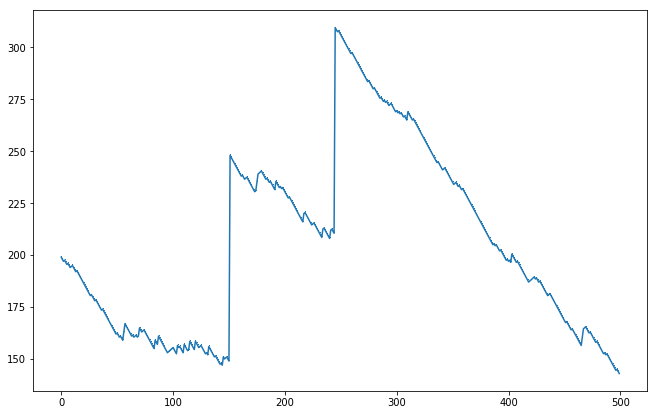

In [2]:
# Import the jimmy_slots submodule
from learntools.python import jimmy_slots
# Call the get_graph() function to get Jimmy's graph
graph = jimmy_slots.get_graph()
graph

As you can see, he's hit a bit of bad luck recently. He wants to tweet this along with some choice emojis, but, as it looks right now, his followers will probably find it confusing. He's asked if you can help him make the following changes:

1. Add the title "Results of 500 slot machine pulls"
2. Make the y-axis start at 0. 
3. Add the label "Balance" to the y-axis

After calling `type(graph)` you see that Jimmy's graph is of type `matplotlib.axes._subplots.AxesSubplot`. Hm, that's a new one. By calling `dir(graph)`, you find three methods that seem like they'll be useful: `.set_title()`, `.set_ylim()`, and `.set_ylabel()`. 

Use these methods to complete the function `prettify_graph` according to Jimmy's requests. We've already checked off the first request for you (setting a title).

(Remember: if you don't know what these methods do, use the `help()` function!)

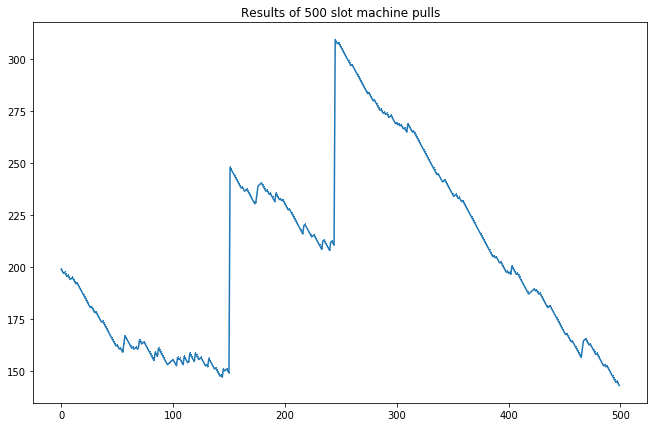

In [3]:
def prettify_graph(graph):
    """Modify the given graph according to Jimmy's requests: add a title, make the y-axis
    start at 0, label the y-axis. (And, if you're feeling ambitious, format the tick marks
    as dollar amounts using the "$" symbol.)
    """
    graph.set_title("Results of 500 slot machine pulls")
    # Complete steps 2 and 3 here

graph = jimmy_slots.get_graph()
prettify_graph(graph)
graph

**Bonus:** Can you format the numbers on the y-axis so they look like dollar amounts? e.g. $200 instead of just 200.

(We're not going to tell you what method(s) to use here. You'll need to go digging yourself with `dir(graph)` and/or `help(graph)`.)

In [4]:
q1.solution()

<span style="color:#33cc99">Solution:</span> 
```python
def prettify_graph(graph):
    graph.set_title("Results of 500 slot machine pulls")
    # Make the y-axis begin at 0
    graph.set_ylim(bottom=0)
    # Label the y-axis
    graph.set_ylabel("Balance")
    # Bonus: format the numbers on the y-axis as dollar amounts
    # An array of the values displayed on the y-axis (150, 175, 200, etc.)
    ticks = graph.get_yticks()
    # Format those values into strings beginning with dollar sign
    new_labels = ['${}'.format(int(amt)) for amt in ticks]
    # Set the new labels
    graph.set_yticklabels(new_labels)
```

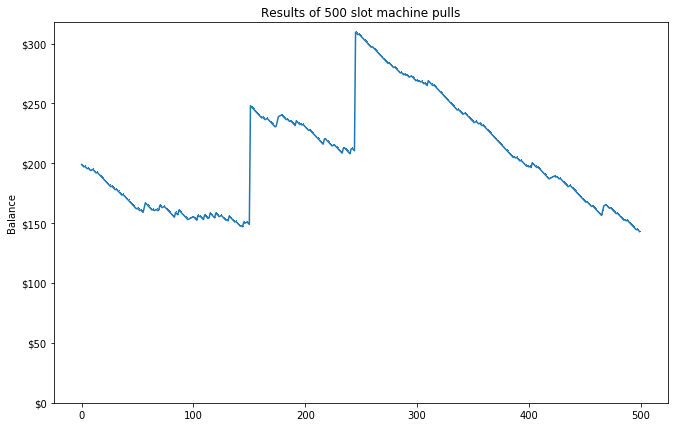

In [5]:
def prettify_graph(graph):
    """Modify the given graph according to Jimmy's requests: add a title, make the y-axis
    start at 0, label the y-axis. (And, if you're feeling ambitious, format the tick marks
    as dollar amounts using the "$" symbol.)
    """
    graph.set_title("Results of 500 slot machine pulls")
    # Complete steps 2 and 3 here
    graph.set_ylim(0)
    graph.set_ylabel("Balance")
    # An array of the values displayed on the y-axis (150, 175, 200, etc.)
    ticks = graph.get_yticks()
    # Format those values into strings beginning with dollar sign
    new_labels = ['${}'.format(int(amt)) for amt in ticks]
    # Set the new labels
    graph.set_yticklabels(new_labels)

graph = jimmy_slots.get_graph()
prettify_graph(graph)
graph

## 2. **

Luigi is trying to perform an analysis to determine the best items for winning races on the Mario Kart circuit. He has some data in the form of lists of dictionaries that look like...

    [
        {'name': 'Peach', 'items': ['green shell', 'banana', 'green shell',], 'finish': 3},
        {'name': 'Bowser', 'items': ['green shell',], 'finish': 1},
        # Sometimes the racer's name wasn't recorded
        {'name': None, 'items': ['mushroom',], 'finish': 2},
        {'name': 'Toad', 'items': ['green shell', 'mushroom'], 'finish': 1},
    ]

`'items'` is a list of all the power-up items the racer picked up in that race, and `'finish'` was their placement in the race (1 for first place, 3 for third, etc.).

He wrote the function below to take a list like this and return a dictionary mapping each item to how many times it was picked up by first-place finishers.

In [6]:
def best_items(racers):
    """Given a list of racer dictionaries, return a dictionary mapping items to the number
    of times those items were picked up by racers who finished in first place.
    """
    winner_item_counts = {}
    for i in range(len(racers)):
        # The i'th racer dictionary
        racer = racers[i]
        # We're only interested in racers who finished in first
        if racer['finish'] == 1:
            for i in racer['items']:
                # Add one to the count for this item (adding it to the dict if necessary)
                if i not in winner_item_counts:
                    winner_item_counts[i] = 0
                winner_item_counts[i] += 1

        # Data quality issues :/ Print a warning about racers with no name set. We'll take care of it later.
        if racer['name'] is None:
            print("WARNING: Encountered racer with unknown name on iteration {}/{} (racer = {})".format(
                i+1, len(racers), racer['name'])
                 )
    return winner_item_counts

He tried it on a small example list above and it seemed to work correctly:

In [7]:
# (Don't forget to run the cell above so that the best_items function is defined)
sample = [
    {'name': 'Peach', 'items': ['green shell', 'banana', 'green shell',], 'finish': 3},
    {'name': 'Bowser', 'items': ['green shell',], 'finish': 1},
    {'name': None, 'items': ['mushroom',], 'finish': 2},
    {'name': 'Toad', 'items': ['green shell', 'mushroom'], 'finish': 1},
]
best_items(sample)

{'green shell': 2, 'mushroom': 1}

However, when he tried running it on his full dataset, the program crashed with a `TypeError`.

Can you guess why? Try running the code cell below to see the error message Luigi is getting. Once you've identified the bug, fix it in the cell below (so that it runs without any errors).

Hint: Luigi's bug is similar to one we encountered in the [day 7 tutorial](https://www.kaggle.com/colinmorris/learn-python-challenge-day-7).

In [8]:
# Import luigi's full dataset of race data
from learntools.python.luigi_analysis import full_dataset

# Fix me!
def best_items(racers):
    winner_item_counts = {}
    for i in range(len(racers)):
        # The i'th racer dictionary
        racer = racers[i]
        # We're only interested in racers who finished in first
        if racer['finish'] == 1:
            for i in racer['items']:
                # Add one to the count for this item (adding it to the dict if necessary)
                if i not in winner_item_counts:
                    winner_item_counts[i] = 0
                winner_item_counts[i] += 1

        # Data quality issues :/ Print a warning about racers with no name set. We'll take care of it later.
        if racer['name'] is None:
            print("WARNING: Encountered racer with unknown name on iteration {}/{} (racer = {})".format(
                i+1, len(racers), racer['name'])
                 )
    return winner_item_counts

# Try analyzing the imported full dataset
best_items(full_dataset)

TypeError: Can't convert 'int' object to str implicitly

In [11]:
q2.hint()

<span style="color:#3366cc">Hint:</span> A couple things to consider:

- What is the type of variable `i`?
- What happens if you inspect the `full_dataset` list you imported? (Don't worry, it's not actually that big.) Can you find the racer that's causing the error?

In [12]:
q2.solution()

<span style="color:#33cc99">Solution:</span> Luigi used the variable name `i` to represent each item in racer['items'].
However, he also used `i` as the loop variable for the outer loop (`for i in range(len(racers))`).
These i's are clobbering each other. This becomes a problem only if we encounter a racer
with a finish of 1 and a name of `None`. If that happens, when we try to print the "WARNING" message,
`i` refers to a string like "green shell", which python can't add to an integer, hence a `TypeError`.

We can fix this by using different loop variables for the inner and outer loops. `i` wasn't a very
good variable name for the inner loop anyways. `for item in racer['items']` fixes the bug and is 
easier to read.

Variable shadowing bugs like this don't come up super often, but when they do they can take an infuriating amount of time to diagnose!


## 3.

Suppose we wanted to create a new type to represent hands in blackjack. One thing we might want to do with this type is overload the comparison operators like `>` and `<=` so that we could use them to check whether one hand beats another.

```python
>>> hand1 = BlackjackHand(['K', 'A'])
>>> hand2 = BlackjackHand(['7', '10', 'A'])
>>> hand1 > hand2
True
```

Well, we're not going to do all that in this question (defining custom classes was a bit too advanced to make the cut for the Learn Python Challenge), but the code we're asking you to write in the function below is very similar to what we'd have to write if we were defining our own BlackjackHand class. (We'd put it in the `__gt__` magic method to define our custom behaviour for `>`.)

Fill in the body of `blackjack_hand_greater_than` according to the docstring.

In [ ]:
def blackjack_hand_greater_than(hand_1, hand_2):
    """
    Return True if hand_1 beats hand_2, and False otherwise.
    
    In order for hand_1 to beat hand_2 the following must be true:
    - The total of hand_1 must not exceed 21
    - The total of hand_1 must exceed the total of hand_2 OR hand_2's total must exceed 21
    
    Hands are represented as a list of cards. Each card is represented by a string.
    
    When adding up a hand's total, cards with numbers count for that many points. Face
    cards ('J', 'Q', and 'K') are worth 10 points. 'A' can count for 1 or 11.
    
    When determining a hand's total, you should try to count aces in the way that 
    maximizes the hand's total without going over 21. e.g. the total of ['A', 'A', '9'] is 21,
    the total of ['A', 'A', '9', '3'] is 14.
    
    Examples:
    >>> blackjack_hand_greater_than(['K'], ['3', '4'])
    True
    >>> blackjack_hand_greater_than(['K'], ['10'])
    False
    >>> blackjack_hand_greater_than(['K', 'K', '2'], ['3'])
    False
    """
    pass

q3.check()

In [ ]:
def tot(h):
    t = 0
    a = 0
    for card in h:
        if card in 'JKQ':
            t += 10
        elif card == 'A':
            a += 1
        else:
            t += int(card)
    if a and (t + 10 <= 21):
        t += 10
    return t + a

def blackjack_hand_greater_than(hand_1, hand_2):
    t1 = tot(hand_1)
    t2 = tot(hand_2)
    return t1 <= 21 and (t1 > t2 or t2 > 21)

q3.check()

In [ ]:
def tot(h):
    t = 0
    a = 0
    for card in h:
        if card in 'JKQ':
            t += 10
        elif card == 'A':
            a += 1
        else:
            t += int(card)
    if a and (t + a + 10 <= 21):
        t += 10
    return t + a

def blackjack_hand_greater_than(hand_1, hand_2):
    t1 = tot(hand_1)
    t2 = tot(hand_2)
    return t1 <= 21 and (t1 > t2 or t2 > 21)

q3.check()

In [ ]:
print(
    tot(['2', '8']),
    tot(['A']),
    tot(['2', '1', 'J', '1', '5', 'K']),
    tot(['9', 'A', '2']),
)

In [ ]:
q3.hint()
q3.solution()

## 4.

In day 6 of the challenge, you heard a tip-off that the roulette tables at the Learn Python Casino had some quirk where the probability of landing on a particular number was partly dependent on the number the wheel most recently landed on. You wrote a function `conditional_roulette_probs` which returned a dictionary with counts of how often the wheel landed on `x` then `y` for each value of `x` and `y`.

After analyzing the output of your function, you've come to the following conclusion: for each wheel in the casino, there is exactly one pair of numbers `a` and `b`, such that, after the wheel lands on `a`, it's significantly more likely to land on `b` than any other number. If the last spin landed on anything other than `a`, then it acts like a normal roulette wheel, with equal probability of landing on any of the 11 numbers (* the casino's wheels are unusually small - they only have the numbers from 0 to 10 inclusive).

It's time to exploit this quirk for fun and profit. You'll be writing a roulette-playing agent to beat the house. When called, your agent will have an opportunity to sit down at one of the casino's wheels for 1000 spins. You don't need to bet on every spin. For example, the agent below bets on a random number unless the last spin landed on 4 (in which case it just watches).

In [ ]:
from learntools.python import roulette
import random

def random_and_superstitious(wheel):
    """Interact with the given wheel over 100 spins with the following strategy:
    - if the wheel lands on 4, don't bet on the next spin
    - otherwise, bet on a random number on the wheel (from 0 to 10)
    """
    last_number = 0
    while wheel.num_remaining_spins() > 0:
        if last_number == 4:
            # Unlucky! Don't bet anything.
            guess = None
        else:
            guess = random.randint(0, 10)
        last_number = wheel.spin(number_to_bet_on=guess)

roulette.evaluate_roulette_strategy(random_and_superstitious)

As you might have guessed, our random/superstitious agent tends to lose more than it wins. Can you write an agent that beats the house? 

HINT: it might help to go back to the [day 6 exercise notebook]() and review your code for `conditional_roulette_probs` for inspiration.

In [9]:
from learntools.python import roulette
def my_agent(wheel):
    counts = {}
    def mostfreq():
        if not counts:
            return None
        maxval = max(counts.values())
        maxkeys = [k for k, v in counts.items() if v == maxval]
        return maxkeys[0]
    while wheel.num_remaining_spins() > 0:
        guess = mostfreq()
        num = wheel.spin(guess)
        counts[num] = counts.get(num, 0) + 1
        
        

roulette.evaluate_roulette_strategy(my_agent)

Report:
seconds taken: 8.3
Ran 20,000 simulations with 100 spins each.
Average gain per simulation: $0.47
Average # bets made: 99.0
Average # bets successful: 9.9 (10.0% success rate)


In [13]:
def my_agent(wheel):
    pass

roulette.evaluate_roulette_strategy(my_agent)

Report:
seconds taken: 0.1
Ran 20,000 simulations with 100 spins each.
Average gain per simulation: $0.00
Average # bets made: 0.0
Average # bets successful: 0.0 (nan% success rate)


In [14]:
def my_agent(wheel):
    counts = {}
    def mostfreq():
        if not counts:
            return None
        maxval = max(counts.values())
        maxkeys = [k for k, v in counts.items() if v == maxval]
        return maxkeys[0] if len(maxkeys) == 1 else None
    while wheel.num_remaining_spins() > 0:
        guess = mostfreq()
        num = wheel.spin(guess)
        counts[num] = counts.get(num, 0) + 1

roulette.evaluate_roulette_strategy(my_agent)

Report:
seconds taken: 7.6
Ran 20,000 simulations with 100 spins each.
Average gain per simulation: $1.68
Average # bets made: 71.4
Average # bets successful: 7.3 (10.2% success rate)


In [17]:
def my_agent(wheel):
    counts = {}
    def mostfreq():
        if not counts:
            return None
        maxval = max(counts.values())
        nonmax = [v for v in counts.values() if v != maxval]
        if not nonmax:
            return None
        maxkeys = [k for k, v in counts.items() if v == maxval]
        if len(maxkeys) != 1:
            return None
        nextmost = max(nonmax)
        if maxval - nextmost <= 1:
            return None
        if maxval / nextmost < 1.5:
            return None
        return maxkeys[0]
        
    while wheel.num_remaining_spins() > 0:
        guess = mostfreq()
        num = wheel.spin(guess)
        counts[num] = counts.get(num, 0) + 1

roulette.evaluate_roulette_strategy(my_agent)

Report:
seconds taken: 9.4
Ran 20,000 simulations with 100 spins each.
Average gain per simulation: $1.54
Average # bets made: 13.6
Average # bets successful: 1.5 (11.1% success rate)


You've finished the Learn Python Challenge. Congrats!

Though you'd see this message just from scrolling down, even if you didn't write a line of code. So maybe you've done it, and maybe not.

If you have questions from the challenge, or just want to keep talking about it, come to the [Learn Forum](https://kaggle.com/learn-forum).

If you want to keep building your skills with our Data Science courses, check out [Kaggle Learn](https://www.kaggle.com/Learn).

Finally, I have a short survey to help me understand what you learned, what you liked, and what you didn't like. It will only take a couple minutes, and it will help me build better challenges in the future for you and everyone else.

I hope you've had fun.